In [129]:
import numpy as np
import pandas as pd
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_palette('colorblind')
sns.set_theme()

## Reading absorbers

`spectra_TNG50-1_z{redshift}_n{N}d{d}_fullbox_{instrument}_{ion}`

In [47]:
abs_path = './../spectra_Roland/absorbers/MgII/'

In [48]:
absorbers_z_05 = h5py.File(abs_path + 'MgII_full/spectra_TNG50-1_z0.5_2_4MOST_HRS_MgII_2796-MgII_2803.hdf5', 'r')
absorbers_z_05.keys()

<KeysViewHDF5 ['EW_MgII_2796', 'EW_MgII_2803', 'EW_total', 'flux', 'master_wave', 'ray_pos']>

In [49]:
absorbers_z_07 = h5py.File(abs_path + 'MgII_full/spectra_TNG50-1_z0.7_2_4MOST_HRS_MgII_2796-MgII_2803.hdf5', 'r')
absorbers_z_07.keys()

<KeysViewHDF5 ['EW_MgII_2796', 'EW_MgII_2803', 'EW_total', 'flux', 'master_wave', 'ray_pos']>

In [50]:
absorbers_z_1 = h5py.File(abs_path + 'MgII_full/spectra_TNG50-1_z1.0_2_4MOST_HRS_MgII_2796-MgII_2803.hdf5', 'r')
absorbers_z_1.keys()

<KeysViewHDF5 ['EW_MgII_2796', 'EW_MgII_2803', 'EW_total', 'flux', 'master_wave', 'ray_pos']>

In [51]:
for absor in [absorbers_z_05['EW_MgII_2796'], absorbers_z_07['EW_MgII_2796'], absorbers_z_1['EW_MgII_2796']]:
    print('Length =', absor.shape)
    print('Minimum =', np.min(absor))
    print('Mean =', np.mean(absor))
    print('Median =', np.median(absor))
    print('Maximum', np.max(absor), '\n')

Length = (55077,)
Minimum = 0.0006630511
Mean = 0.2628653
Median = 0.031023469
Maximum 8.561692 

Length = (64672,)
Minimum = 0.00066512794
Mean = 0.29549444
Median = 0.03319695
Maximum 11.172448 

Length = (78124,)
Minimum = 0.0006652446
Mean = 0.34022468
Median = 0.03391719
Maximum 29.98556 



In [52]:
EW_MgII2796_z_05 = h5py.File(abs_path + 'MgII_EW2796_rest_005/MgII_abs_EW2796_rest_005_0.5.hdf5', 'r')
EW_MgII2796_z_05.keys()

<KeysViewHDF5 ['EW_MgII_2796', 'EW_MgII_2803', 'EW_total', 'flux', 'master_wave', 'ray_pos']>

In [53]:
print('Length =', EW_MgII2796_z_05['EW_MgII_2796'].shape)
print('Minimum =', np.min(EW_MgII2796_z_05['EW_MgII_2796']))
print('Mean =', np.mean(EW_MgII2796_z_05['EW_MgII_2796']))
print('Median =', np.median(EW_MgII2796_z_05['EW_MgII_2796']))
print('Maximum', np.max(EW_MgII2796_z_05['EW_MgII_2796']), '\n')

Length = (22649,)
Minimum = 0.05000657836596171
Mean = 0.41340750340764715
Median = 0.2797364592552185
Maximum 5.707794825236003 



---

## Reading train-test samples

$ \text{EW}^{rest}_{2796} \geq 0.05 \implies $ WITH absorber

$ \text{EW}^{rest}_{2796} < 0.05 \implies $ no absorber

In [43]:
test = h5py.File('./../spectra_Roland/samples/test_samples/real_samples/SNRfull_WLfull_WL_fixed_range_fixed_test_ygap.hdf5', 'r')
test.keys()

<KeysViewHDF5 ['EW_r_2796', 'EW_r_2803', 'EW_r_total', 'SNR', 'absorber_true', 'cent_WL_2796', 'cent_pix_2796', 'flux', 'master_wave', 'redshift']>

In [44]:
train = h5py.File('./../spectra_Roland/samples/training_samples/real_samples/WL_fixed/SNRfull_WLfull_range_fixed_ygap.hdf5', 'r')
train.keys()

<KeysViewHDF5 ['EW_r_2796', 'EW_r_2803', 'EW_r_total', 'SNR', 'absorber_true', 'cent_WL_2796', 'cent_pix_2796', 'flux', 'master_wave', 'redshift']>

In [28]:
for set__ in [train['EW_r_2796'], train['EW_r_2796'][train['EW_r_2796'][:]>=0.05], test['EW_r_2796'], test['EW_r_2796'][test['EW_r_2796'][:]>=0.05]]:
    print('Length =', set__.shape)
    print('Minimum =', np.min(set__))
    print('Mean =', np.mean(set__))
    print('Median =', np.median(set__))
    print('Maximum', np.max(set__), '\n')

Length = (685237,)
Minimum = 0.0
Mean = 2.063230799118556
Median = 1.9293942170984606
Maximum 5.128101348876953 

Length = (548184,)
Minimum = 0.05005777254700661
Mean = 2.57906484518994
Median = 2.567206541697184
Maximum 5.128101348876953 

Length = (731031,)
Minimum = 0.0
Mean = 1.289981783514945
Median = 0.0
Maximum 5.128101348876953 

Length = (365512,)
Minimum = 0.05000977714856466
Mean = 2.579988271752265
Median = 2.5672359466552734
Maximum 5.128101348876953 



In [29]:
train_with_abs_perc = 100 * train['EW_r_2796'][train['EW_r_2796'][:]>=0.05].shape[0] / (train['EW_r_2796'].shape[0])
print(f'Perc of spec with absorbers in training set = {train_with_abs_perc:.3f}')
print(f'Perc of spec without absorbers in training set = {100 - train_with_abs_perc:.3f} \n')

test_with_abs_perc = 100 * test['EW_r_2796'][test['EW_r_2796'][:]>=0.05].shape[0] / (test['EW_r_2796'].shape[0])
print(f'Perc of spec with absorbers in test set = {test_with_abs_perc:.3f}')
print(f'Perc of spec without absorbers in test set = {100 - test_with_abs_perc:.3f} \n')

Perc of spec with absorbers in training set = 79.999
Perc of spec without absorbers in training set = 20.001 

Perc of spec with absorbers in test set = 50.000
Perc of spec without absorbers in test set = 50.000 



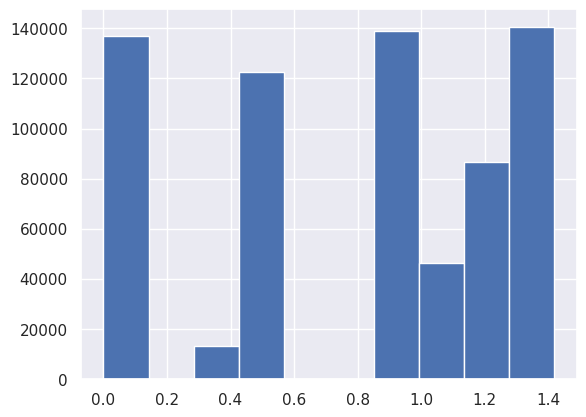

In [30]:
plt.hist(train['redshift']);

## Plot a few training spec

In [94]:
wave_blue_arm = train['master_wave'][train['master_wave'][:]<=4355]  # blue arm
wave_green_arm = train['master_wave'][(train['master_wave'][:]>=5159.8) & (train['master_wave'][:]<5730)]  # green arm
wave_red_arm = train['master_wave'][train['master_wave'][:]>=6099.8]  # red arm

In [126]:
def split_spec_into_arms(flux_array):
    '''
    Splits full flux array into the 3 4MOST HRS windows
    '''
    blue_flux = flux_array[:len(wave_blue_arm)]
    green_flux = flux_array[len(wave_blue_arm):(len(wave_blue_arm)+len(wave_green_arm))]
    red_flux = flux_array[(len(wave_blue_arm)+len(wave_green_arm)):]

    return blue_flux, green_flux, red_flux

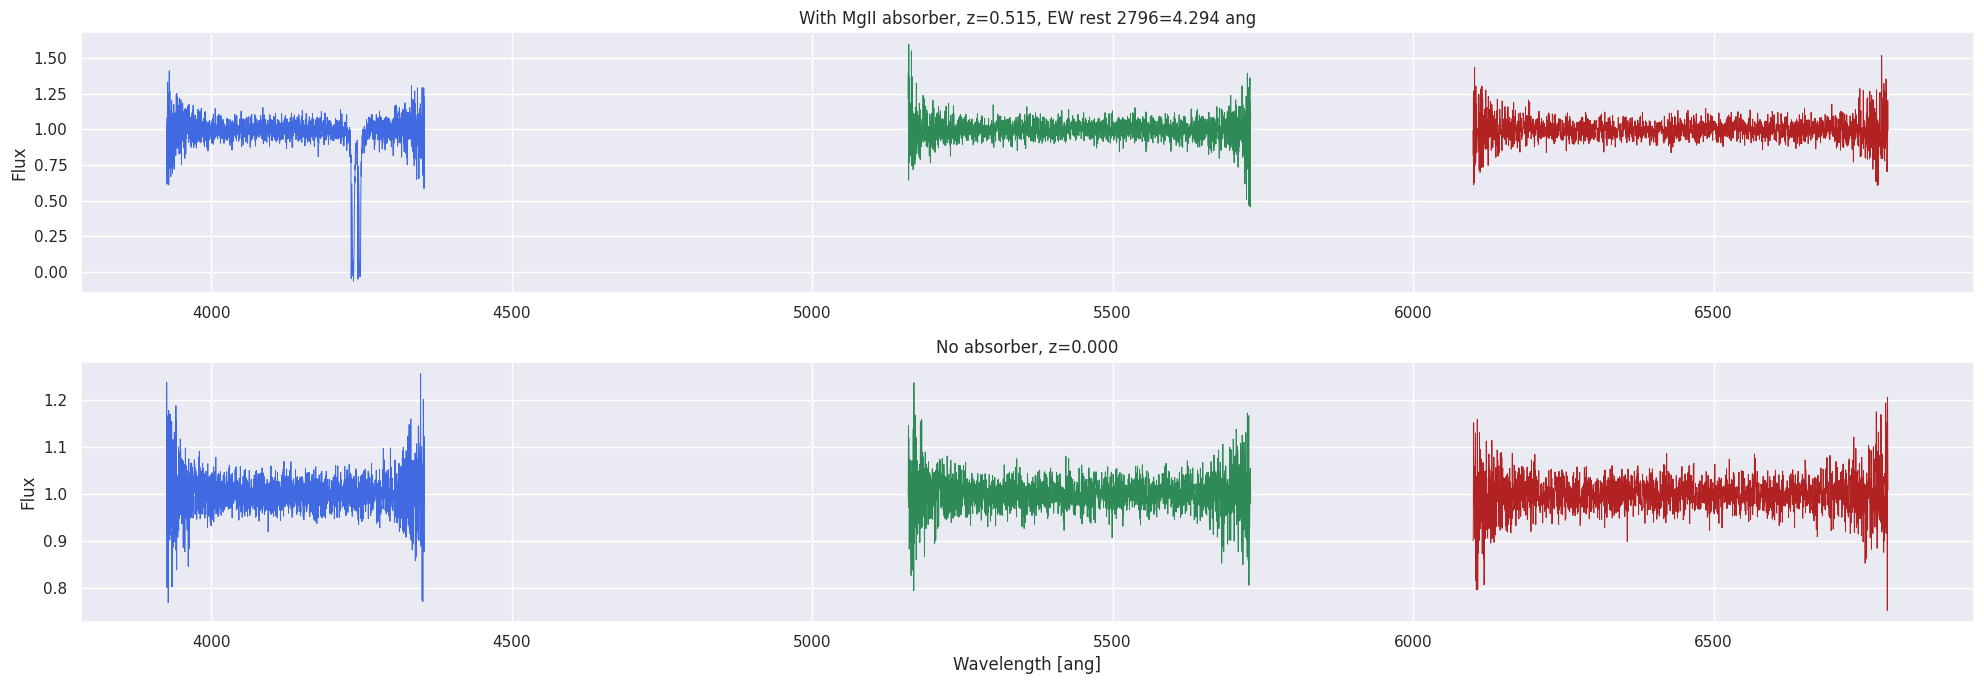

In [133]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(20, 7))

np.random.seed(41)

random_with_idx = np.random.choice(np.where(train['EW_r_2796'][:] >= 0.05)[0])
random_with_abs = train['flux'][random_with_idx, :]
random_with_blue, random_with_green, random_with_red = split_spec_into_arms(random_with_abs)
ax1.plot(wave_blue_arm, random_with_blue, c='royalblue', lw=0.7)
ax1.plot(wave_green_arm, random_with_green, c='seagreen', lw=0.7)
ax1.plot(wave_red_arm, random_with_red, c='firebrick', lw=0.7)

random_without_idx = np.random.choice(np.where(train['EW_r_2796'][:] < 0.05)[0])
random_without_abs = train['flux'][random_without_idx, :]
random_without_blue, random_without_green, random_without_red = split_spec_into_arms(random_without_abs)
ax2.plot(wave_blue_arm, random_without_blue, c='royalblue', lw=0.7)
ax2.plot(wave_green_arm, random_without_green, c='seagreen', lw=0.7)
ax2.plot(wave_red_arm, random_without_red, c='firebrick', lw=0.7)

plt.xlabel('Wavelength [ang]')
ax1.set_ylabel('Flux')
ax2.set_ylabel('Flux')
ax1.set_title(f'With MgII absorber, z={train["redshift"][random_with_idx]:.3f}, EW rest 2796={train["EW_r_2796"][random_with_idx]:.3f} ang')
ax2.set_title(f'No absorber, z={train["redshift"][random_without_idx]:.3f}')

plt.tight_layout()
plt.savefig('./../spectra_Roland/plotted_spectra/example_specs_with_without_abs.png', dpi=400)

plt.show()